In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
pd.pandas.set_option("display.max_columns",None)


In [4]:
train=pd.read_csv("creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Cluster Based Over Sampling # 

In [5]:
y=train['Class']
train.drop(['Class'],axis=1,inplace=True)

In [6]:
# train test split of the dataset
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

In [7]:
import imblearn

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler
smote = SMOTE(random_state=42)
kmeans = KMeans(n_clusters=50, random_state=42)
kmeans_smote = ClusterOverSampler(oversampler=smote, clusterer=kmeans)

# Fit and resample imbalanced data
x_cos, y_cos = kmeans_smote.fit_resample(x_train, y_train)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_cos))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<AxesSubplot:xlabel='Class', ylabel='count'>

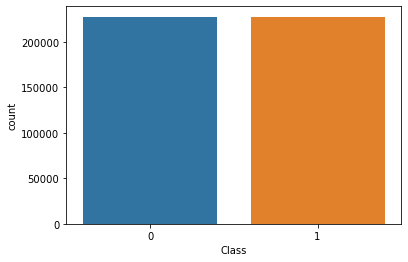

In [9]:
sns.countplot(y_cos)

In [ ]:
# SMOTE # 

In [10]:
# smote
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_smote))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<AxesSubplot:xlabel='Class', ylabel='count'>

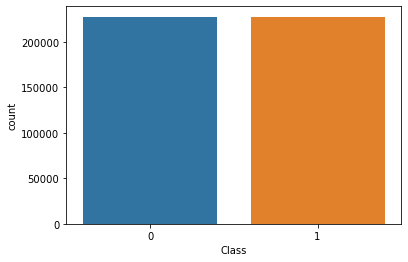

In [11]:
sns.countplot(y_smote)

In [ ]:
# Near Miss # 

In [12]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape: Counter({0: 394, 1: 394})


<AxesSubplot:xlabel='Class', ylabel='count'>

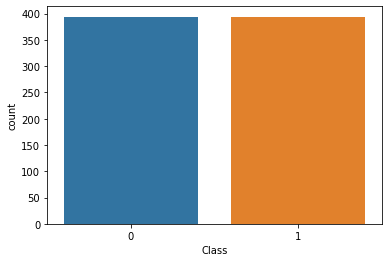

In [13]:
sns.countplot(y_nm)

In [14]:
# Model Building # 

#1.logistic regression Logistic Regression
#2.k-Nearest Neighbors
#3.Decision Trees
#4.Support Vector Machine
#5.Naive Bayes
#6.Bagging Decision Tree 
#7.Boosted Decision Tree 
#8. Random Forest 

In [15]:
# Logistic Regression With SMOTE # 

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_1=LogisticRegression()
model_1.fit(x_smote,y_smote)
pred_1=model_1.predict(x_test)
acc_1 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_1}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9833924370633054
Confusion Matrix : 
[[55929   935]
 [   11    87]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.89      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [17]:
# cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
model_1=LogisticRegressionCV(cv=10, random_state=0)
model_1.fit(x_smote,y_smote)
pred_1=model_1.predict(x_test)
acc_1 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_1}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9861311049471577
Confusion Matrix : 
[[56084   780]
 [   10    88]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [18]:
# Logistic Regression With Near Miss # 

In [19]:
# near miss
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_2=LogisticRegression()
model_2.fit(x_nm,y_nm)
pred_2=model_2.predict(x_test)
acc_2 = accuracy_score(y_test, pred_2)
con_mat = confusion_matrix(y_test, pred_2)
clf_report = classification_report(y_test, pred_2)
print(f"Accuracy Score of Logistic Regression : {acc_2}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.7703381201502756
Confusion Matrix : 
[[43787 13077]
 [    5    93]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     56864
           1       0.01      0.95      0.01        98

    accuracy                           0.77     56962
   macro avg       0.50      0.86      0.44     56962
weighted avg       1.00      0.77      0.87     56962



In [20]:
# cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
model_2=LogisticRegressionCV(cv=5, random_state=1,max_iter=1000)
model_2.fit(x_nm,y_nm)
pred_2=model_1.predict(x_test)
acc_2 = accuracy_score(y_test, pred_2)
con_mat = confusion_matrix(y_test, pred_2)
clf_report = classification_report(y_test, pred_2)
print(f"Accuracy Score of Logistic Regression : {acc_2}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9861311049471577
Confusion Matrix : 
[[56084   780]
 [   10    88]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [21]:
# Logistic Regression With ClusterOverSampler # 

In [22]:
# cluster based sampling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_3=LogisticRegression()
model_3.fit(x_cos,y_cos)
pred_3=model_3.predict(x_test)
acc_3 = accuracy_score(y_test, pred_3)
con_mat = confusion_matrix(y_test, pred_3)
clf_report = classification_report(y_test, pred_3)
print(f"Accuracy Score of Logistic Regression : {acc_3}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9970155542291352
Confusion Matrix : 
[[56724   140]
 [   30    68]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.69      0.44        98

    accuracy                           1.00     56962
   macro avg       0.66      0.85      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
# cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_3=LogisticRegressionCV(cv=5,random_state=0)
model_3.fit(x_cos,y_cos)
pred_3=model_3.predict(x_test)
acc_3 = accuracy_score(y_test, pred_3)
con_mat = confusion_matrix(y_test, pred_3)
clf_report = classification_report(y_test, pred_3)
print(f"Accuracy Score of Logistic Regression : {acc_3}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9979459990871107
Confusion Matrix : 
[[56781    83]
 [   34    64]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56962
   macro avg       0.72      0.83      0.76     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
# Decision Tree Classifier with SMOTE # 

In [26]:
# decision Tree Classifier
model_4=DecisionTreeClassifier()
model_4.fit(x_smote,y_smote)
pred_4=model_4.predict(x_test)
acc_4 = accuracy_score(y_test, pred_4)
con_mat = confusion_matrix(y_test, pred_4)
clf_report = classification_report(y_test, pred_4)
print(f"Accuracy Score of Decision Tree : {acc_4}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.9977002212000983
Confusion Matrix : 
[[56755   109]
 [   22    76]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.78      0.54        98

    accuracy                           1.00     56962
   macro avg       0.71      0.89      0.77     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
# Decision Tree With Near Miss # 

In [28]:
# decision Tree Classifier
model_5=DecisionTreeClassifier()
model_5.fit(x_nm,y_nm)
pred_5=model_5.predict(x_test)
acc_5 = accuracy_score(y_test, pred_5)
con_mat = confusion_matrix(y_test, pred_5)
clf_report = classification_report(y_test, pred_5)
print(f"Accuracy Score of Decision Tree : {acc_5}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.3832203925423967
Confusion Matrix : 
[[21736 35128]
 [    5    93]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.38      0.55     56864
           1       0.00      0.95      0.01        98

    accuracy                           0.38     56962
   macro avg       0.50      0.67      0.28     56962
weighted avg       1.00      0.38      0.55     56962



In [29]:
# Decision Tree With ClusterOverSampler # 

In [30]:
# decision Tree Classifier
model_6=DecisionTreeClassifier()
model_6.fit(x_cos,y_cos)
pred_6=model_6.predict(x_test)
acc_6 = accuracy_score(y_test, pred_6)
con_mat = confusion_matrix(y_test, pred_6)
clf_report = classification_report(y_test, pred_6)
print(f"Accuracy Score of Decision Tree : {acc_6}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.9990871107053826
Confusion Matrix : 
[[56835    29]
 [   23    75]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.77      0.74        98

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
# Model Comparison # 

In [45]:
d = {'Technique': ['Logistic SMOTE', 'Logistic Near miss','Logistic Clover','Decision Tree SMOTE', 'Decision Tree Near miss',
                   'Decision Tree Clover'], 'Score': [acc_1,acc_2,acc_3,acc_4,acc_5,acc_6]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
 
final_df.sort_values(by="Score",ascending=False)

,Technique,Score
5,Decision Tree Clover,0.999087
2,Logistic Clover,0.997946
3,Decision Tree SMOTE,0.997700
0,Logistic SMOTE,0.986131
1,Logistic Near miss,0.986131
4,Decision Tree Near miss,0.383220
